In [101]:
import pandas as pd
from io import StringIO

In [102]:
#creiamo un file csv
csv_data = \
'''A,B,C,D
1.1, 2.0, 3.0, 4.0
5.0, 6.0,,8.0
10.0, 11.0, 12.0,'''

In [103]:
df=pd.read_csv(StringIO(csv_data))

In [104]:
#visualizzati in pandas
df

,A,B,C,D
0,1.1,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [105]:
#visualizzati in numpy
df.values

array([[  1.1,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   nan,   8. ],
       [ 10. ,  11. ,  12. ,   nan]])

In [106]:
#conta i nan colonna per colonna
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [107]:
#elimina le colonne con elementi nan
df.dropna(axis=1)

,A,B
0,1.1,2.0
1,5.0,6.0
2,10.0,11.0


In [108]:
#elimina le righ9e con elementi nana
df.dropna(axis=0)

,A,B,C,D
0,1.1,2.0,3.0,4.0


In [109]:
#elimina le righe che hanno meno di 4 valori reali
df.dropna(thresh=4)

,A,B,C,D
0,1.1,2.0,3.0,4.0


In [110]:
#elimina le righe che hanno un nan nella colonna C
df.dropna(subset=['C'])

,A,B,C,D
0,1.1,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [111]:
#elimina le righe che hanno tutti i valori nan
df.dropna(how='all')

,A,B,C,D
0,1.1,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [112]:
from sklearn.preprocessing import Imputer

In [113]:
#ad ogni nan presente nelle righe sostituiamo la media
imr=Imputer(missing_values='NaN', strategy='mean', axis=0)
imr=imr.fit(df.values)
imputed_data= imr.transform(df.values)
imputed_data

array([[  1.1,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

In [114]:
#ad ogni nan presente nelle righe sostituiamo il più frequente
imr=Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imr=imr.fit(df.values)
imputed_data= imr.transform(df.values)
imputed_data

array([[  1.1,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   3. ,   8. ],
       [ 10. ,  11. ,  12. ,   4. ]])

In [115]:
df= pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']   
])
df.columns=['color', 'size', 'price', 'classlabel']

In [116]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [117]:
#mappatura 
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}

In [118]:
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [119]:
#mappatura inversa
inv_size_mapping= {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [120]:
import numpy as np

In [121]:
#mappatura con numpy
class_mapping= {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [122]:
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [123]:
#mappatura inversa con numpy
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel']= df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [126]:
from sklearn.preprocessing import LabelEncoder

In [128]:
#mappatura più semplice
class_le=LabelEncoder()
y= class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [130]:
#mappatura inversa più semplice
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [131]:
X= df [['color', 'size', 'price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [133]:
#mappatura colore
color_le=LabelEncoder()
X[:,0]=color_le.fit_transform(X[:,0])

In [134]:
from sklearn.preprocessing import OneHotEncoder

In [142]:
#One hot encoding (codifica non ordinale)
ohe= OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:, 1:] #eliminiamo una colonna per semplificare gli algoritmi successivi

array([[  1. ,   0. ,   1. ,  10.1],
       [  0. ,   1. ,   2. ,  13.5],
       [  0. ,   0. ,   3. ,  15.3]])

In [144]:
#get dummies (più semplice di ohe)
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)#eliminiamo una colonna per semplificare gli algoritmi successivi

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [167]:
#Carichiamo il dataset vini
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/wine/wine.data', header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [171]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavonoids', 'Nonflavonoid phenols','Proanthocyanis', 'Color intensity',
                  'Hue', 'OD280/OD315 of diluited wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanis,Color intensity,Hue,OD280/OD315 of diluited wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [172]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble improt RandomForestClassifier

In [173]:
#preparazione del dataset
X, y= df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)



In [184]:
#Calcoliamo l'importanza delle feature
forest=RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
feat_labels=df_wine.columns[1:]
importances = forest.feature_importances_
indices=np.argsort(importances)[::-1]
sfm= SelectFromModel(forest, threshold=0.01, prefit=True)
X_selected=sfm.transform(X_train)
print ('Numero di campioni che rispettano questo criterio:', X_selected.shape[0])

Numero di campioni che rispettano questo criterio: 124


In [186]:
for f in range (X_selected.shape[1]): print ("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], 
                                                                                    importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavonoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluited wines  0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanis                 0.025570
11) Alcalinity of ash              0.022366
12) Nonflavonoid phenols           0.013354
13) Ash                            0.013279


In [189]:
#aumentando la soglia di importanza
sfm= SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected=sfm.transform(X_train)
for f in range (X_selected.shape[1]): print ("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], 
                                                                                    importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavonoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluited wines  0.136162
 5) Alcohol                        0.118529


In [191]:
import matplotlib.pyplot as plt

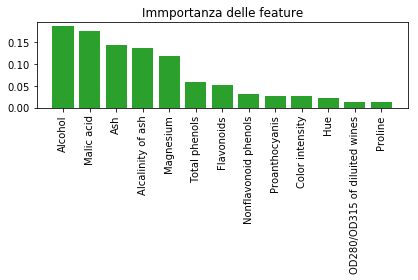

In [194]:
plt.title('Immportanza delle feature')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()